In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_excel('train_data.xlsx')
data.head()

,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [117]:
def column_name_set(data):
    data.columns = ['Sentence', 'Emotion']
    return data

In [118]:
data = column_name_set(data)
data.head()

,Sentence,Emotion
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [119]:
data.describe()

,Sentence,Emotion
count,4923,4923
unique,4923,5
top,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,HAPPY
freq,1,1462


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4923 non-null   object
 1   Emotion   4923 non-null   object
dtypes: object(2)
memory usage: 77.0+ KB


In [121]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_15828\1880826210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

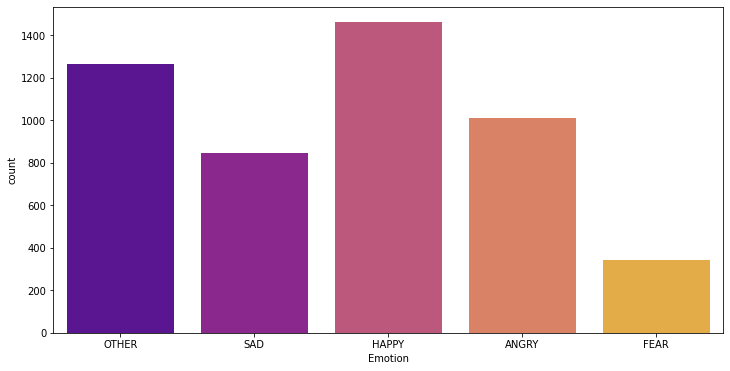

In [122]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Emotion', palette='plasma')

In [123]:
data.duplicated().sum()

0

#### The provided data set contains a collection of Persian sentences and the corresponding emotions associated with each sentence. The dataset has two columns: one for the sentence and the other for the emotion of that sentence. Initially, the column names were not provided, so the first step was to set appropriate names for the columns. This was done to ensure clarity and ease of reference when working with the data. After setting the column names, the next step was to check the data for any null values or duplicate rows. Fortunately, the analysis revealed that there were no null values or duplicate rows in the dataset. Finally, to gain a better understanding of the data, a count plot of the target values (emotions) was generated. The result of this analysis showed that the majority of the sentences in the dataset evoke a sense of happiness, while the sentences conveying a sense of fear are the least common.

# Preproccessing

In [124]:
import hazm 

In [125]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'R', ')', '٢', 'ت', 'ق', '(', 'و', '~', '۴', '?', ' ', 'a', 'ف', 'ھ', '؛', 'ى', 'u', 'g', 'ۀ', 'L', '۰', 'k', '#', 'چ', '️', 'ث', '۵', 'O', 'س', 'ɴ', 'ᴏ', '5', '\u2067', '|', '❤', 'ژ', '\u2069', 'پ', 'ظ', 'آ', 'e', 'د', 'b', 'ِ', '°', 'ئ', '⭐', '‐', '☘', '+', '♀', 'J', ';', 'i', 'أ', '☺', 'َ', 'S', '”', '&', '-', 'ْ', ']', '\n', '8', 'q', '⚽', 'ذ', 'م', 'Z', 'ُ', '4', 'ه', 'w', 'P', 'ً', '»', 'ء', 'K', 'ؤ', '♂', 'N', '¹', '✅', '0', '۔', 'ᴇ', '“', '⚘', 'ټ', 'خ', 'ي', '…', '٣', '⁉', '♥', 't', 'f', 'ض', '%', '١', '۶', 'گ', '!', '3', '\u2066', 'T', 'j', 'ٔ', '*', '۷', '⃟', '☹', 'y', '}', '1', 'B', 'ا', 'l', 'm', 'ر', '/', 'ّ', '✋', 'ص', '⛓', '٬', '•', '²', 'ح', '۳', '۹', '⊰', 'ل', 'ة', 'n', 'V', 'ی', 'W', '[', 'M', '=', 'z', 'F', '_', 'غ', 'ع', 'H', 'E', '☄', '٠', 'v', '✌', '؟', 'A', '9', '6', 'ز', 'ب', '^', 'ج', '✨', 'r', ',', '٦', '❄', 'h', 'I', '‘', '\u200d', '،', 'D', 'ʏ', ':', 'x', 'd', 'ہ', 'p', '☝', '☠', '«', 'ە', 'ش', 'ط', '✍', '’', 'Q', 'G', '.', 'ن', '۲', '۱', 's', 'U', '٫',

In [126]:
def normalize_yeh(text):
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']
    for char in yeh_characters:
        text = text.replace(char, 'ی')
    return text

In [127]:
def number_convertor(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

In [128]:
data['Sentence'] = data['Sentence'].apply(number_convertor)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

199
{'R', ')', '٢', 'ت', 'ق', '(', 'و', '~', '?', ' ', 'a', 'ف', 'ھ', '؛', 'ى', 'u', 'g', 'ۀ', 'L', 'k', '#', 'چ', '️', 'ث', 'O', 'س', 'ɴ', 'ᴏ', '5', '\u2067', '|', '❤', 'ژ', '\u2069', 'پ', 'ظ', 'آ', 'e', 'د', 'b', 'ِ', '°', 'ئ', '⭐', '‐', '☘', '+', '♀', 'J', ';', 'i', 'أ', '☺', 'َ', 'S', '”', '&', '-', 'ْ', ']', '\n', '8', 'q', '⚽', 'ذ', 'م', 'Z', 'ُ', '4', 'ه', 'w', 'P', 'ً', '»', 'ء', 'K', 'ؤ', '♂', 'N', '¹', '✅', '0', '۔', 'ᴇ', '“', '⚘', 'ټ', 'خ', 'ي', '…', '٣', '⁉', '♥', 't', 'f', 'ض', '%', '١', 'گ', '!', '3', '\u2066', 'T', 'j', 'ٔ', '*', '⃟', '☹', 'y', '}', '1', 'B', 'ا', 'l', 'm', 'ر', '/', 'ّ', '✋', 'ص', '⛓', '٬', '•', '²', 'ح', '⊰', 'ل', 'ة', 'n', 'V', 'ی', 'W', '[', 'M', '=', 'z', 'F', '_', 'غ', 'ع', 'H', 'E', '☄', '٠', 'v', '✌', '؟', 'A', '9', '6', 'ز', 'ب', '^', 'ج', '✨', 'r', ',', '❄', 'h', 'I', '‘', '\u200d', '،', 'D', 'ʏ', ':', 'x', 'd', 'ہ', 'p', '☝', '☠', '«', 'ە', 'ش', 'ط', '✍', '’', 'Q', 'G', '.', 'ن', 's', 'U', '٫', 'o', 'ک', '2', '⭕', '\u200c', 'ᴛ', 'C', '٪', 'ك',

In [129]:
data['Sentence'] = data['Sentence'].apply(normalize_yeh)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

195
{'R', ')', '٢', 'ت', 'ق', '(', 'و', '~', '?', ' ', 'a', 'ف', 'ھ', '؛', 'u', 'g', 'ۀ', 'L', 'k', '#', 'چ', '️', 'ث', 'O', 'س', 'ɴ', 'ᴏ', '5', '\u2067', '|', '❤', 'ژ', '\u2069', 'پ', 'ظ', 'آ', 'e', 'د', 'b', 'ِ', '°', '⭐', '‐', '☘', '+', '♀', 'J', ';', 'i', 'أ', '☺', 'َ', 'S', '”', '&', '-', 'ْ', ']', '\n', '8', 'q', '⚽', 'ذ', 'م', 'Z', 'ُ', '4', 'ه', 'w', 'P', 'ً', '»', 'ء', 'K', 'ؤ', '♂', 'N', '¹', '✅', '0', '۔', 'ᴇ', '“', '⚘', 'ټ', 'خ', '…', '٣', '⁉', '♥', 't', 'f', 'ض', '%', '١', 'گ', '!', '3', '\u2066', 'T', 'j', 'ٔ', '*', '⃟', '☹', 'y', '}', '1', 'B', 'ا', 'l', 'm', 'ر', '/', 'ّ', '✋', 'ص', '⛓', '٬', '•', '²', 'ح', '⊰', 'ل', 'ة', 'n', 'V', 'ی', 'W', '[', 'M', '=', 'z', 'F', '_', 'غ', 'ع', 'H', 'E', '☄', '٠', 'v', '✌', '؟', 'A', '9', '6', 'ز', 'ب', '^', 'ج', '✨', 'r', ',', '❄', 'h', 'I', '‘', '\u200d', '،', 'D', 'ʏ', ':', 'x', 'd', 'ہ', 'p', '☝', '☠', '«', 'ە', 'ش', 'ط', '✍', '’', 'Q', 'G', '.', 'ن', 's', 'U', '٫', 'o', 'ک', '2', '⭕', '\u200c', 'ᴛ', 'C', '٪', 'ك', 'ـ', 'c', 'Y',

In [130]:
def text_normalizer(data):
    normalizer = hazm.Normalizer()
    data['Sentence'] = data['Sentence'].apply(normalizer.normalize)
    return data

In [131]:
data = text_normalizer(data)
data.head()

,Sentence,Emotion
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی‌که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر می‌شد,SAD


In [132]:
def word_tokenizer(data):
    data['Sentence'] = data['Sentence'].apply(hazm.word_tokenize)
    return data

In [133]:
data = word_tokenizer(data)
data.head()

,Sentence,Emotion
0,"[عکسی, که, چند, روز, پیش, گذاشته_بودم, این, فی...",OTHER
1,"[تنهاییم, شبیه, تنهاییه, ظهرای, بچگیم, شده, وق...",SAD
2,"[خوبه, تمام, قسمت‌های, گوشی, رو, محافظت, می‌کنه]",HAPPY
3,"[این, خاک‌مال, مردمان, است, نه, حاکمان, #ایران...",ANGRY
4,"[اگه, تو, بغلت, بودم, حالم, خیلی, بهتر, می‌شد]",SAD


In [134]:
def text_lemmatizer(data):
    lemmatizer = hazm.Lemmatizer()
    data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
    return data

In [135]:
data = text_lemmatizer(data)
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [136]:
import re

def num_omitter(data):
    data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'\d+', '', x))
    return data

In [137]:
data = num_omitter(data)
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [138]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

163
{'R', ')', 'ت', 'ق', '(', '"', 'و', '~', '?', ' ', 'a', 'ف', '؛', 'u', 'g', 'L', 'k', '#', 'چ', '️', 'ث', 'O', 'س', 'ᴏ', '\u2067', '|', '❤', 'ژ', '\u2069', 'پ', 'ظ', 'آ', 'e', 'د', 'b', '°', 'ɴ', '⭐', '‐', '☘', '+', '♀', 'J', ';', 'i', 'أ', '☺', 'S', '&', '-', ']', 'q', '⚽', 'ذ', 'م', 'Z', 'ء', '}', 'ه', 'w', 'P', '»', 'K', 'ؤ', '♂', 'N', '¹', '✅', 'ᴇ', '⚘', 'خ', '…', '⁉', '♥', 't', 'f', 'ض', 'گ', '!', '\u2066', 'T', 'j', '*', '⃟', '☹', 'y', 'B', 'ا', 'l', 'm', 'ر', '/', '✋', '٬', 'ص', '⛓', '•', '²', 'ح', '⊰', 'ل', 'ة', 'n', 'V', 'ی', 'W', '[', 'M', '=', 'z', 'F', '_', 'غ', 'ع', 'H', 'E', '☄', 'v', '✌', '؟', 'A', 'ز', 'ب', '^', 'ج', '✨', 'r', ',', '❄', 'h', 'I', '‘', '\u200d', '،', 'D', 'ʏ', ':', 'x', 'd', 'p', '☝', '☠', '«', '✍', 'ش', 'ط', '’', 'Q', 'G', '.', 'ن', 's', 'U', '٫', 'o', 'ک', '⭕', '\u200c', 'ᴛ', 'C', '٪', 'c', 'Y'}


#### In this part, we have performed some preprocessing on the data using the Hazm library, which is designed to process Persian text and data. First, we discovered that there are five different types of the letter "yeh" in our text, so we converted all of them to a specific, standardized form. This helps ensure consistency in the representation of the text. Next, we noticed that the text contained both Persian and English digits. Since digits do not have a significant effect on sentiment analysis, we decided to remove them. To do this, we first converted all digits to their English equivalents, which made it easier to remove them later. The next step in the preprocessing was to normalize the text using the Hazm library. Normalizing text in the context of natural language processing (NLP) refers to the process of transforming text into a standardized format or representation. This typically involves tasks such as converting all text to lowercase, removing stop words (common words that do not carry significant meaning), and other similar operations. After normalizing the text, we used a word tokenizer to separate the words into individual tokens. This is an important step for many NLP tasks, as it allows us to work with the text at the word level. The next step was lemmatization, which uses linguistic knowledge to convert words to their base or dictionary form. This helps to reduce the dimensionality of the text and can improve the performance of various NLP models. Finally, as the last step, we omitted all the digits from the text, as they were not deemed relevant for the sentiment analysis task.

# Data Splitting

In [139]:
from sklearn.model_selection import train_test_split

def splitter(data):
    train_data, test_data = train_test_split(data, random_state=42, test_size=0.2)

    return train_data, test_data

In [140]:
train_data, test_data = splitter(data)

C:\Users\hi\AppData\Local\Temp\ipykernel_15828\1392288644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

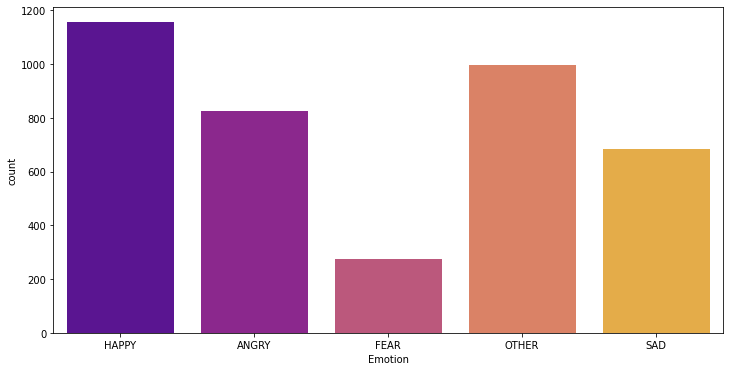

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Emotion', palette='plasma')

In [142]:
print(train_data.shape)
print(test_data.shape)

(3938, 2)
(985, 2)


In [143]:
def target_split(train_data, test_data):
    train_x = pd.DataFrame(train_data['Sentence'], columns=['Sentence'], index=train_data.index)
    train_y = train_data['Emotion']

    test_x = pd.DataFrame(test_data['Sentence'], columns=['Sentence'], index=test_data.index)
    test_y = test_data['Emotion']

    return train_x, train_y, test_x, test_y

In [144]:
train_x, train_y, test_x, test_y = target_split(train_data, test_data)

# Feature engineering

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

def text_vectorizer(train_x, test_x):

    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(train_x['Sentence'])
    vectorized_x_train = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out(), index=train_data.index)

    vector2 = vectorizer.transform(test_x['Sentence'])
    vectorized_x_test = pd.DataFrame(vector2.toarray(), columns=vectorizer.get_feature_names_out(), index=test_data.index)

    return vectorized_x_train, vectorized_x_test

In [146]:
vectorized_x_train, vectorized_x_test = text_vectorizer(train_x, test_x)

In [147]:
vectorized_x_train.head()

,__,_اسنپ,_امینی,_ای,_جام,_دی,_زلزله,_و_,_پول,_ژانویه,...,یکمی,یکپارچگی,یکپارچگیه,یکی,یکیشون,یگانه,یی,ییره,ییشینگی,ییمیز
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
vectorized_x_train.shape

(3938, 7592)

In [149]:
vectorized_x_test.shape

(985, 7592)

#### As it is clear, it is impossible to train a machine learning model on data that consists solely of text and words. This is because models require numerical inputs that they can interpret and process, rather than raw text data. Therefore, we need to convert the textual data into numerical representations that the model can understand.
#### One common technique for this is called TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a method that assigns a numerical value to each word in a text corpus, based on the word's frequency within a document and across the entire corpus.

$$ \text{TF} = \frac{\text{Number\: of\, times\: a\: word\: "X"\: appeares\: in\: a\: Document}}{\text{Number\: of\: words\: present\: in\: a\: Document}} $$
$$ \text{IDF} = \log(\frac{\text{Number\: of\, Document\: presents\: in\: a\: Corpus}}{\text{Number\: of\: Documents\: Where\: word\: "X"\: has\: appeared}}) $$
$$ \text{TF-IDF} = \text{TF} \times \text{IDF} $$

# Model Training

In [150]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix, auc 
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model, param_grid):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    classifier = grid_search.best_estimator_

    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    f1_test = f1_score(y_test, y_test_pred, average='macro') 

    print('Cross validation scores:')
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    print('train_data report:')
    print('Acuuracy: ', end='')
    print(train_accuracy)
    print('F1_score: ', end='')
    print(f1_train)

    cm = confusion_matrix(y_train, y_train_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('test_data report:')
    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

    cm = confusion_matrix(y_test, y_test_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [151]:
from sklearn.preprocessing import LabelEncoder

def pipline(train, test, model, param_grid):
    # Preproccessing

    # column name setting 
    train = column_name_set(train)
    test = column_name_set(test)

    # changing ی in the text
    train['Sentence'] = train['Sentence'].apply(normalize_yeh)
    test['Sentence'] = test['Sentence'].apply(normalize_yeh)
    # convert number to English
    train['Sentence'] = train['Sentence'].apply(number_convertor)
    test['Sentence'] = test['Sentence'].apply(number_convertor)

    # normalize and tokenize the text
    train = text_normalizer(train)
    train = word_tokenizer(train)
    test = text_normalizer(test)
    test = word_tokenizer(test)

    # lemmatizing the text
    train = text_lemmatizer(train)
    test = text_lemmatizer(test)

    # omitting digits
    test = num_omitter(test)
    test = num_omitter(test)

    # target splitting
    train_x, train_y, test_x, test_y = target_split(train, test)

    # text vectorizing 
    vectorized_x_train, vectorized_x_test = text_vectorizer(train, test)

    #encoding target
    label_encoder = LabelEncoder()
    train_y_encoded = label_encoder.fit_transform(train_y)
    test_y_encoded = label_encoder.transform(test_y)

    # Model training
    model_train_test_evaluating(vectorized_x_train, train_y_encoded, vectorized_x_test, test_y_encoded, model, param_grid)

In [152]:
data = pd.read_excel('train_data.xlsx')

Cross validation scores:
Best parameters: {'max_depth': 30, 'min_samples_leaf': 10}
Best score: 0.4911
train_data report:
Acuuracy: 0.5700863382427628
F1_score: 0.5426938227898179


<Figure size 576x432 with 0 Axes>

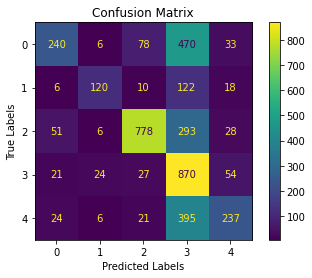

test_data report:
Acuuracy: 0.5147208121827411
F1_score: 0.463544538169345


<Figure size 576x432 with 0 Axes>

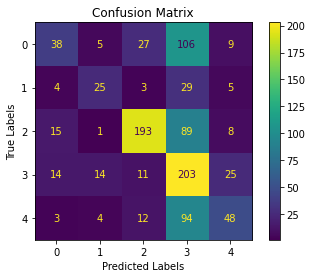

In [153]:
from sklearn import tree

# Data splitting
data1 = data.copy()
train_data, test_data = splitter(data1)

param_grid=[
    {'max_depth': [10, 20, 30], 'min_samples_leaf': [10, 20, 30]}
]

dt_classifier = tree.DecisionTreeClassifier(random_state=42, criterion='gini')
pipline(train_data, test_data, dt_classifier, param_grid)

Cross validation scores:
Best parameters: {'max_depth': 30, 'n_estimators': 50}
Best score: 0.5442
train_data report:
Acuuracy: 0.7559674961909599
F1_score: 0.7325360787032803


<Figure size 576x432 with 0 Axes>

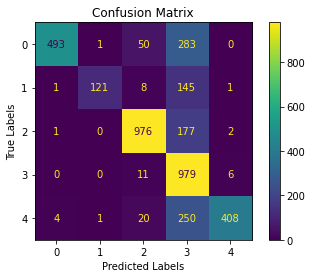

test_data report:
Acuuracy: 0.5604060913705584
F1_score: 0.46213619136039047


<Figure size 576x432 with 0 Axes>

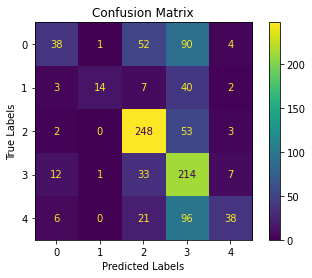

In [154]:
from sklearn.ensemble import RandomForestClassifier

# Data splitting
data2 = data.copy()
train_data, test_data = splitter(data2)

param_grid=[
    {'max_depth': [10, 20, 30], 'n_estimators': [30, 40, 50]}
]

rf_classifier = RandomForestClassifier(random_state=42, criterion='gini')
pipline(train_data, test_data, rf_classifier, param_grid)

Cross validation scores:
Best parameters: {'learning_rate': 0.3, 'max_depth': 5}
Best score: 0.5843
train_data report:
Acuuracy: 0.8557643473844592
F1_score: 0.859572723613866


<Figure size 576x432 with 0 Axes>

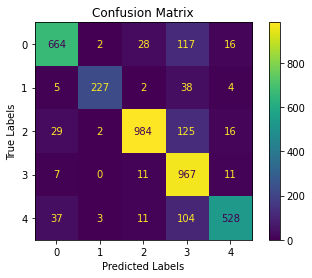

test_data report:
Acuuracy: 0.6030456852791878
F1_score: 0.5700030787247256


<Figure size 576x432 with 0 Axes>

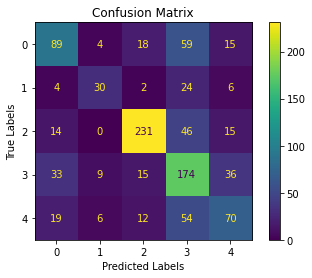

In [155]:
from xgboost import XGBClassifier

# Data splitting
data3 = data.copy()
train_data, test_data = splitter(data3)

param_grid=[
    {'max_depth': [5, 10, 15], 'learning_rate': [0.1, 0.2, 0.3]}
]

xgboost = XGBClassifier(random_state=42)
pipline(train_data, test_data, xgboost, param_grid)

c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Cross validation scores:
Best parameters: {'penalty': 'l2'}
Best score: 0.6051
train_data report:
Acuuracy: 0.8605891315388522
F1_score: 0.8297150726630488


<Figure size 576x432 with 0 Axes>

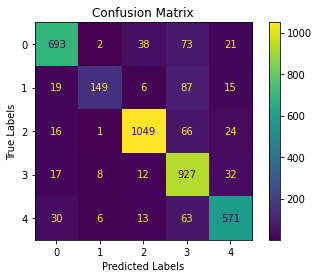

test_data report:
Acuuracy: 0.617258883248731
F1_score: 0.5766789319725942


<Figure size 576x432 with 0 Axes>

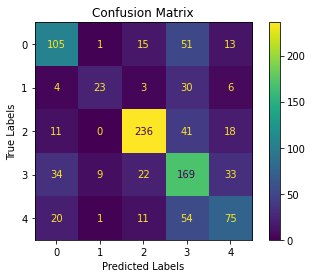

In [156]:
from sklearn.linear_model import LogisticRegression

# Data splitting
data4 = data.copy()
train_data, test_data = splitter(data4)

param_grid=[
    {'penalty': ['l1', 'l2']}
]

logistic_regression = LogisticRegression(random_state=42, solver='saga')
pipline(train_data, test_data, logistic_regression, param_grid)

Cross validation scores:
Best parameters: {'kernel': 'linear'}
Best score: 0.5907
train_data report:
Acuuracy: 0.7889791772473337
F1_score: 0.7593779399092081


<Figure size 576x432 with 0 Axes>

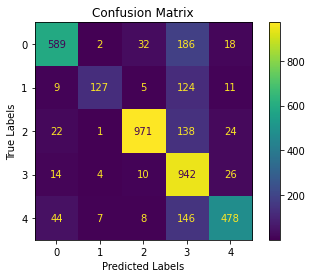

test_data report:
Acuuracy: 0.6223350253807106
F1_score: 0.5691760729647461


<Figure size 576x432 with 0 Axes>

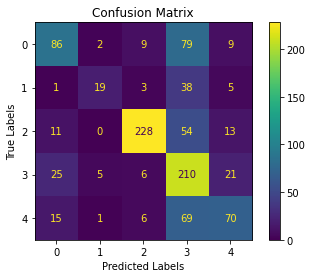

In [157]:
from sklearn.svm import SVC

# Data splitting
data5 = data.copy()
train_data, test_data = splitter(data5)

param_grid=[
    {'kernel': ['linear','poly', 'rbf']}
]

svm = SVC(C=0.5)
pipline(train_data, test_data, svm, param_grid)

#### Finally, in this section, we focused on training models with our dataset and evaluating their performance through 5-fold cross-validation. To achieve this, we constructed a function pipeline that streamlines the training and evaluation process by taking in training and testing datasets, a machine learning model, and a set of parameters. Within this pipeline, we ensured that all the previously mentioned data preprocessing steps were systematically applied. The core functionality of the pipeline involves performing a grid search for hyperparameter tuning. Grid search systematically works through multiple combinations of parameter values, cross-validating each combination to determine which provides the best performance. We implemented this using 5-fold cross-validation, meaning that the training data is split into five subsets. The model is trained on four subsets and validated on the fifth. This process is repeated five times, each time with a different subset as the validation set. By doing so, the model’s performance is assessed comprehensively, which minimizes the risk of overfitting and ensures that the model generalizes well to unseen data.Through this meticulous approach, the pipeline identifies the best parameters by finding the combination that consistently provides the highest performance across all folds. Once these optimal parameters are determined, the best model parameters are selected, and the final model is trained on the entire training dataset. Its performance is then evaluated on the test dataset.

#### The models which we trained include some tree-based models such as DecisionTreeClassifier, RandomForestClassifier, and XGBoost. We also trained Support Vector Machines (SVM) and Logistic Regression. It is obvious that the non-tree based models, such as SVM and Logistic Regression, have performed significantly better than the tree-based models. Among the tree-based models, the ensemble learning models, like RandomForest and XGBoost, have had better results compared to the single DecisionTreeClassifier model. Ensemble methods, such as Random Forest and XGBoost, combine multiple decision trees to create a more robust and accurate model, which helps to overcome the limitations of individual decision trees and improves the overall performance. The superior performance of the non-tree based models, such as SVM and Logistic Regression, suggests that the underlying data and problem at hand may be better suited for these types of algorithms compared to the tree-based models.